# Exercises of Linear Regression

## 1. Linear Regression with One Variable

### Load adn Set up the data

-----------------------
magic function for jupyter:  
[%matplotlib](http://ipython.org/ipython-doc/3/interactive/magics.html#magic-matplotlib)

[numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy-loadtxt)

[numpy.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html#numpy-transpose)

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
x, y = numpy.loadtxt('ex1data1.txt',delimiter=',',unpack=True)
x = numpy.transpose(numpy.array([x]))
y = numpy.transpose(numpy.array([y]))

### Plot the data

--------------------------------------

[matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

[matplotlib.pyplot.figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib-pyplot-figure)

[matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib-pyplot-plot)

[matplotlib.pyplot.grid](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html?highlight=grid#matplotlib-pyplot-grid)

[matplotlib.pyplot.xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html?highlight=xlabel#matplotlib-pyplot-xlabel)

[matplotlib.pyplot.title](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html#matplotlib-pyplot-title)

Text(0.5,0,'Population of City in 10,000s')

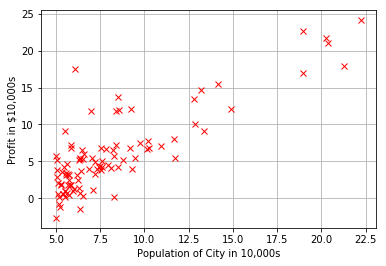

In [3]:
plt.figure()
plt.plot(x, y, 'rx')
plt.grid(True)
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of City in 10,000s")

### Implement gradient descent

--------------------------------------------
[numpy.insert](https://docs.scipy.org/doc/numpy/reference/generated/numpy.insert.html#numpy-insert)

[numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy-dot)
 
[numpy.ndarrey.T](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html#numpy-ndarray-t)

[numpy.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html#numpy-sum)

In [4]:
X = numpy.insert(x, 0, 1, axis=1)
m = y.size
theta_init = numpy.array([[0],[0]])
# learning rate: alpha
alpha = 0.01

In [5]:
def hypothesisFunc(X, theta):
    return numpy.dot(X, theta)

def calCost(thisTheta, X, y):
    # h(x)_power2 - y_power2
    xmy = hypothesisFunc(X, thisTheta) - y
    return float(numpy.dot(xmy.T, xmy))/2/m

In [6]:
def nextTheta(thisTheta, X, y):
    nextThetaList = []
    for j in range(thisTheta.size):
        nextThetaList.append(float(thisTheta[j])-alpha/m*float(numpy.dot((hypothesisFunc(X, thisTheta) - y).T, X[:,j])))
    return numpy.array([nextThetaList]).T

In [7]:
def gradDescent(iteration, initTheta, X, y):
    thisTheta = initTheta
    for i in range(iteration):
        thisTheta = nextTheta(thisTheta, X, y)
    return thisTheta

In [8]:
# try the gradient descent interation for 2000 times
gradDescent(2000, theta_init, X, y)

array([[-3.78806857],
       [ 1.18221277]])

### Visualizing J($\theta$)
-----------------------------------
[mplot3d](https://matplotlib.org/tutorials/toolkits/mplot3d.html)

check [this](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) to see how to plot 3D figures

color map:  
[matplotlib.cm](https://matplotlib.org/api/cm_api.html#cm-colormap)

[itertools](https://docs.python.org/3.6/library/itertools.html)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

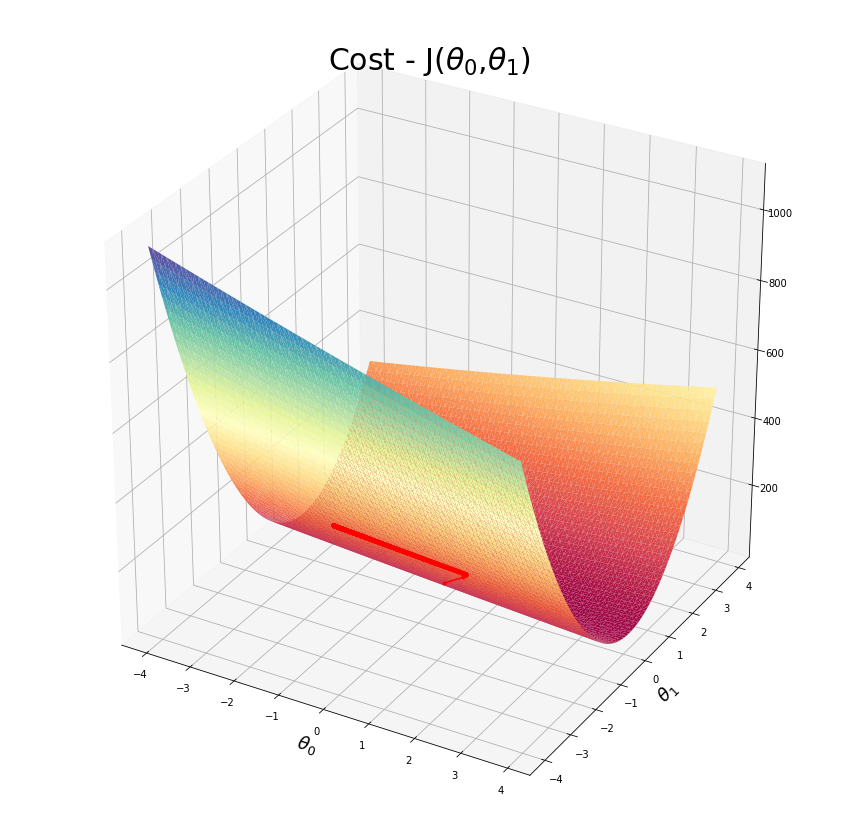

In [10]:
fig = plt.figure(figsize=(15,15))
ax3d = fig.add_subplot(111, projection='3d')

xvals = numpy.arange(-4,4,.1)
yvals = numpy.arange(-4,4,.1)
xs, ys, zs = [], [], []
for xx in xvals:
    for yy in yvals:
        xs.append(xx)
        ys.append(yy)
        zs.append(calCost(numpy.array([[xx], [yy]]),X,y))

plt.xlabel(r'$\theta_0$', fontsize=18)
plt.ylabel(r'$\theta_1$', fontsize=18)
plt.title(r'Cost - J($\theta_0$,$\theta_1$)', fontsize=30)
ax3d.plot_trisurf(xs, ys, zs, cmap=cm.Spectral)

theta0 = []
theta1 = []
cost = []

thisTheta = theta_init
for i in range(1000):
    theta0.append(float(numpy.dot(thisTheta.T, numpy.array([[1], [0]]))))
    theta1.append(float(numpy.dot(thisTheta.T, numpy.array([[0], [1]]))))
    cost.append(calCost(thisTheta, X, y))
    thisTheta = nextTheta(thisTheta, X, y)
    
plt.plot(theta0, theta1, cost, 'r.-')

## 2. Linear Regression with Multiple Variables

In [11]:
x1, x2, y = numpy.loadtxt('ex1data2.txt',delimiter=',',unpack=True)
x = numpy.transpose(numpy.array([x1,x2]))
y = numpy.transpose(numpy.array([y]))

### Feature Normalization

[numpy.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html#numpy-mean)

[numpy.std](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy-std)

In [12]:
x1_norm = (x1 - numpy.mean(x1))/numpy.std(x1)
x2_norm = (x2 - numpy.mean(x2))/numpy.std(x2)
x_norm = numpy.transpose(numpy.array([x1_norm,x2_norm]))

### Gradient descent has already been implemented in One Variable version

In [13]:
X = numpy.insert(x_norm, 0, 1, axis=1)
m = y.size
theta_init = numpy.array([[0],[0],[0]])
# learning rate: alpha
alpha = 0.01

thetaForTwoVar = gradDescent(2000, theta_init, X, y)
thetaForTwoVar

array([[ 340412.65894002],
       [ 109439.22578243],
       [  -6569.78416695]])

## 3. Normal Equations

get inv matrix:   
[numpy.linalg.inv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy-linalg-inv)

In [21]:
def normalEquations(X,y):
    return numpy.dot(numpy.dot(numpy.linalg.inv(numpy.dot(X.T,X)),X.T),y)

thetaFromNormalEquations = normalEquations(X, y)
thetaFromNormalEquations

array([[ 340412.65957447],
       [ 109447.79646964],
       [  -6578.35485416]])

### compare results from normal equation method and gradient descent

to predict the price of a house with 1650 square feet and 3 bedrooms

In [26]:
# normalize x
x_1650_3_norm = numpy.array([[1, (1650 - numpy.mean(x1))/numpy.std(x1), (3 - numpy.mean(x2))/numpy.std(x2)]])

print("Gradient Descent: $%0.3f" % float(numpy.dot(x_1650_3_norm, thetaForTwoVar)))
print("Normal Equations: $%0.3f" % float(numpy.dot(x_1650_3_norm, thetaFromNormalEquations)))

Gradient Descent: $293083.349
Normal Equations: $293081.464
